# Vehicle Insurance Fraud Detection

# 1. Introduction


Source: https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection

Vehicle insurance fraud involves conspiring to make false or exaggerated claims involving property damage or personal injuries following an accident. Some common examples include staged accidents where fraudsters deliberately “arrange” for accidents to occur; the use of phantom passengers where people who were not even at the scene of the accident claim to have suffered grievous injury, and make false personal injury claims where personal injuries are grossly exaggerated.

**About this dataset**

This dataset contains vehicle dataset - attribute, model, accident details, etc along with policy details - policy type, tenure etc. The target is to detect if a claim application is fraudulent or not - FraudFound_P.

**Data Description**: Made with the help of ChatGPT.
| Variable                | Descripción                                                                 | Tipo de dato |
|-------------------------|------------------------------------------------------------------------------|--------------|
| Month                   | Mes en que ocurrió el accidente                                             | Categórico       |
| WeekOfMonth             | Semana del mes en que ocurrió el accidente                                  | Numérico        |
| DayOfWeek               | Día de la semana en que ocurrió el accidente                                | Categórico       |
| Make                    | Marca del vehículo                                                          | Categórico       |
| AccidentArea            | Zona del accidente (urbana o rural)                                         | Categórico       |
| DayOfWeekClaimed        | Día de la semana en que se hizo la reclamación                              | Categórico       |
| MonthClaimed            | Mes en que se realizó la reclamación                                        | Categórico       |
| WeekOfMonthClaimed      | Semana del mes en que se hizo la reclamación                                | Numérico        |
| Sex                     | Sexo del asegurado                                                          | Categórico       |
| MaritalStatus           | Estado civil del asegurado                                                  | Categórico       |
| Age                     | Edad del asegurado                                                          | Numérico        |
| Fault                   | Determina si la culpa fue del asegurado o de un tercero                     | Categórico       |
| PolicyType              | Tipo de póliza contratada                                                   | Categórico       |
| VehicleCategory         | Categoría del vehículo (por ejemplo: sedán, SUV, etc.)                      | Categórico       |
| VehiclePrice            | Rango de precio del vehículo                                                | Categórico       |
| FraudFound_P            | Variable objetivo: 1 si hubo fraude, 0 si no                                 | Numérico        |
| PolicyNumber            | Número de póliza                                                            | Numérico        |
| RepNumber               | Número de representante que procesó la reclamación                          | Numérico        |
| Deductible              | Deducible acordado en la póliza (monto que el asegurado debe pagar)         | Numérico        |
| DriverRating            | Calificación del conductor (1 a 4, donde 1 es peor y 4 mejor)                | Numérico        |
| Days_Policy_Accident    | Tiempo desde la contratación hasta el accidente                             | Categórico       |
| Days_Policy_Claim       | Tiempo desde la contratación hasta la reclamación                           | Categórico       |
| PastNumberOfClaims      | Número de reclamaciones pasadas                                             | Categórico       |
| AgeOfVehicle            | Antigüedad del vehículo                                                     | Categórico       |
| AgeOfPolicyHolder       | Rango de edad del titular de la póliza                                      | Categórico       |
| PoliceReportFiled       | Indica si se presentó un informe policial                                   | Categórico       |
| WitnessPresent          | Indica si hubo testigos presentes                                           | Categórico       |
| AgentType               | Tipo de agente de seguros (independiente o corporativo)                     | Categórico       |
| NumberOfSuppliments     | Número de suplementos (documentos adicionales presentados)                  | Categórico       |
| AddressChange_Claim     | Cambio de dirección cercano a la fecha de la reclamación                    | Categórico       |
| NumberOfCars            | Número de autos cubiertos por la póliza                                     | Categórico       |
| Year                    | Año en que se registró el accidente o reclamo                               | Numérico        |
| BasePolicy              | Tipo base de la póliza (por ejemplo: Liability, Collision, etc.)            | Categórico       |


## 1.1. **Import Modules**

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import importlib
import utils

sns.set_style('darkgrid')
importlib.reload(utils)

<module 'utils' from 'e:\\Alexander\\Data Science Projects\\ML_claim_fraud_detection\\utils.py'>

## 1.2. **Import Data**

In [111]:
df = pd.read_csv("data/fraud_oracle.csv")
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


## 1.3 Describe Data

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

Since *PolicyNumber* is a client identificator, we drop it.

In [113]:
df.drop(columns=['PolicyNumber'], inplace=True, errors='ignore')

*WeekOfMonth*, *WeekOfMonthClaimed* and *RepNumber* features require a change in data type to object, since they don't have a mathematical meaning, only nominal.

In [114]:
df.WeekOfMonth = df.WeekOfMonth.astype(dtype='object')
df.WeekOfMonthClaimed = df.WeekOfMonthClaimed.astype(dtype='object')
df.RepNumber = df.RepNumber.astype(dtype='object')

In [115]:
print("Number of observations:", df.shape[0])
print("Number of variables:", df.shape[1])

Number of observations: 15420
Number of variables: 32


In [116]:
# Separate features and target as DataFrames
X_df = df.drop(columns=['FraudFound_P'])
y_df = df['FraudFound_P']

In [117]:
numerical_features = X_df.select_dtypes(exclude='object').columns.tolist()
print(f"There are {len(numerical_features)} numerical features:\n\t {numerical_features}")

categorical_features = df.select_dtypes(include='object').columns.tolist()
print(f"There are {len(categorical_features)} categorical features:\n\t {categorical_features}")

target_column = "FraudFround_P"
print(f"Target is numerical:\n\t {target_column}")

There are 4 numerical features:
	 ['Age', 'Deductible', 'DriverRating', 'Year']
There are 27 categorical features:
	 ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'RepNumber', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']
Target is numerical:
	 FraudFround_P


**Insight**

- Any null values wasn't found by pandas. Further inspection over categorical features is required to check if some categories means null values or related.

# 2. EDA

## 2.1. Numerical Features

In [181]:
numerical_features = X_df.select_dtypes(exclude='object').columns.tolist()
print(f"There are {len(numerical_features)} numerical features:\n\t {numerical_features}")


X_df.describe()

There are 4 numerical features:
	 ['Age', 'Deductible', 'DriverRating', 'Year']


,Age,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000
mean,40.478275,407.704280,2.487808,1994.866472
std,12.276232,43.950998,1.119453,0.803313
min,16.000000,300.000000,1.000000,1994.000000
25%,31.000000,400.000000,1.000000,1994.000000
50%,38.000000,400.000000,2.000000,1995.000000
75%,48.000000,400.000000,3.000000,1996.000000
max,80.000000,700.000000,4.000000,1996.000000


**Insights**

- The *Age* feature of the insured custumer has a minimun of 0, and it seem not o be a possible value, so we requrie to deal with the rows with this age.

### Age

In [119]:
utils.show_value_counts(X_df, 'Age')

,counts,proportions,percentage
Age,,,
0,320,0.021,2.075
16,9,0.001,0.058
17,6,0.000,0.039
18,48,0.003,0.311
19,32,0.002,0.208
...,...,...,...
76,42,0.003,0.272
77,29,0.002,0.188
78,35,0.002,0.227


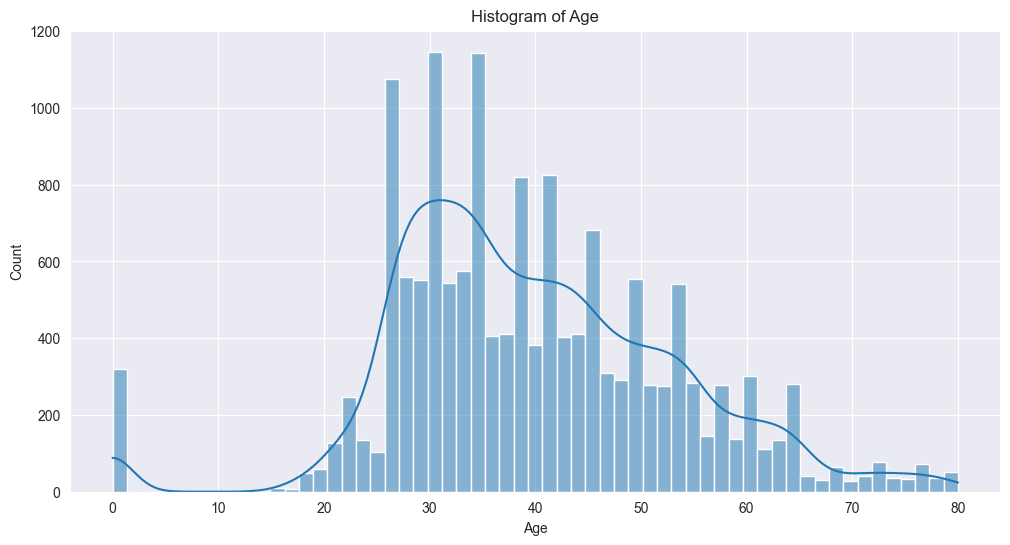

In [120]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))

sns.histplot(data=X_df, x='Age', stat='count', kde=True, ax=ax)
# sns.boxplot(data=X_df, x='Age', ax=ax[1])
plt.title("Histogram of Age")
plt.show()

- 2% of insurance customers have 0 *Age*, suggesting that those observation where typed incorrectly or indicating that there are no age data for those customers (or they were lost), since to have a vehicle insurance you needed to be 16 years old or older (by the time this data was collected FIND DOCUMENTATION).
- Also, that 2% is relevant compared to other ages and intervals, as it can be seen in the histogram, therefore we are going to treat age = 0 by imputing values using other features that seem to be relevant to define *Age* such as *Sex* and *MaritalStatus*.

#### Treatment of *Age* = 0 by Imputing 

We are going to consider imputation using two features: Sex and MaritalStatus. Taking the median of the agrupation.

Text(0.5, 1.0, 'Histogram of Age respect to Marital Status')

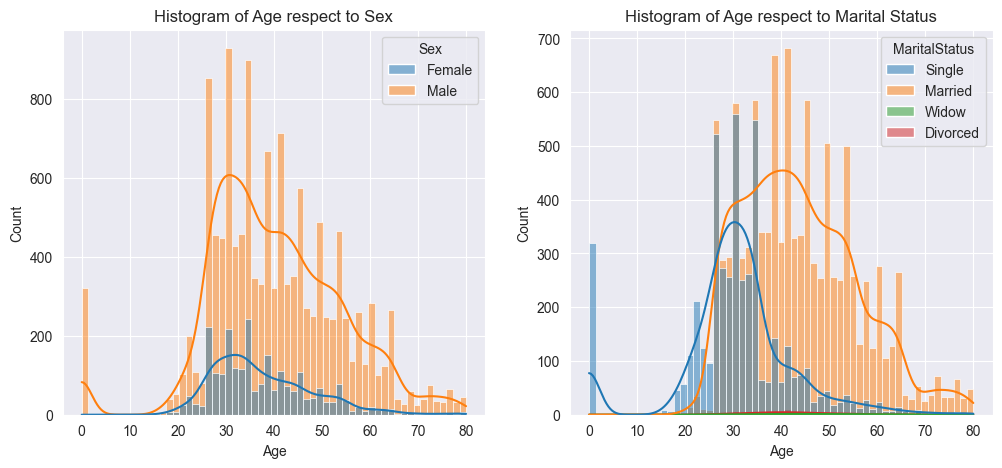

In [121]:
fig, ax  = plt.subplots(1,2, figsize=(12,5))

sns.histplot(data=X_df, x='Age', hue='Sex', ax=ax[0], kde=True)
ax[0].set_title("Histogram of Age respect to Sex")

sns.histplot(data=X_df, x='Age', hue='MaritalStatus', ax=ax[1], kde=True)
ax[1].set_title("Histogram of Age respect to Marital Status")


Only single male customers have 0 age in the dataset, so we are going to replace the median of the grouped data for Male and Single categories.

In [122]:
median_age_to_replace = X_df.groupby(['Sex', 'MaritalStatus'])['Age'].median()['Male']['Single']
X_df.Age = X_df.Age.replace(0, median_age_to_replace)
utils.show_value_counts(X_df, 'Age')

,counts,proportions,percentage
Age,,,
16,9,0.001,0.058
17,6,0.000,0.039
18,48,0.003,0.311
19,32,0.002,0.208
20,28,0.002,0.182
...,...,...,...
76,42,0.003,0.272
77,29,0.002,0.188
78,35,0.002,0.227


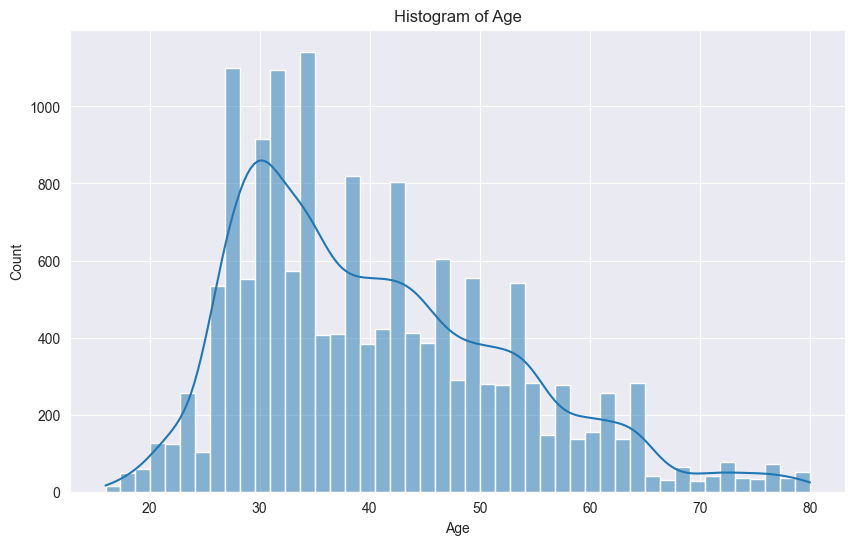

In [123]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

sns.histplot(data=X_df, x='Age', stat='count', kde=True, ax=ax)
# sns.boxplot(data=X_df, x='Age', ax=ax[1])
plt.title("Histogram of Age")
plt.show()

In [124]:
import importlib
importlib.reload(utils)

<module 'utils' from 'e:\\Alexander\\Data Science Projects\\ML_claim_fraud_detection\\utils.py'>

In [125]:
utils.univariate_statistics(X_df.Age)

---- Central Tendency Statistics ----
	Mean: 40.47827496757458
	Median: 38.0
	Mode: 30
---- No Central Statistics ----
	Min: 16
	1st Cuartile: 31.0
	2nd Cuartile: 38.0
	3rd Cuartile: 48.0
	Max: 80
---- Variability Statistics ----
	Range: 64
	Variance: 150.70586433063994
	Standard Deviation: 12.276231682834922
	Variance Coefficient: 30.00%
	IQR: 17.0
---- Shape Statistics ----
	Skewness: 0.7493849973540873
	Kurtosis (Fisher): 0.077148222867506
	Kurtosis (Pearson): 3.077148222867506


**Insights**

- The *Age* variable has a positive skewness = 0.75, and it can also be seen in the histogram.

- From the histogram and KDE we can observe:
    - Most insured customers have ages between 25 to 50 years.
    - The distribution has a quite long tail along to higher ages, the proportion remains approximately constant from 65 to 80 years.
    - Since this distribution is not symmetric, the appropriate central value is taken to be the median = 38 age.
    - The variability of the ages is relatively high with a coefficient of variation of 30% respecto to the mean.

### Deductible

Deducible acordado en la póliza: monto que el asegurado debe pagar para que se procese el reclamo.

In [171]:
utils.show_value_counts(X_df, 'Deductible', sort_index=False, ascending=False)

,counts,proportions,percentage
Deductible,,,
400,14838,0.962,96.226
700,311,0.020,2.017
500,263,0.017,1.706
300,8,0.001,0.052


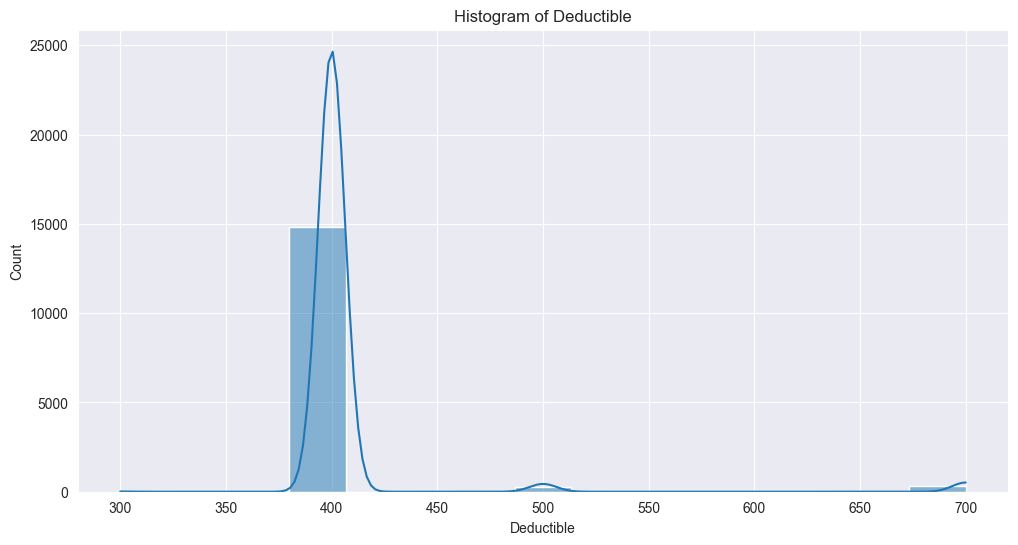

In [127]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))

sns.histplot(data=X_df, x='Deductible', stat='count', kde=True, ax=ax)
# sns.boxplot(data=X_df, x='Age', ax=ax[1])
plt.title("Histogram of Deductible")
plt.show()

**Insights**

- Almost all deductible paid by customers is 400$, with a 96% of data.
- Very few customers paid 300$, with a 0.05 % of them.

### DriverRating

Calificación del conductor.


In [173]:
utils.show_value_counts(X_df, 'DriverRating', sort_index=False, ascending=False)

,counts,proportions,percentage
DriverRating,,,
1,3944,0.256,25.577
3,3884,0.252,25.188
2,3801,0.246,24.650
4,3791,0.246,24.585


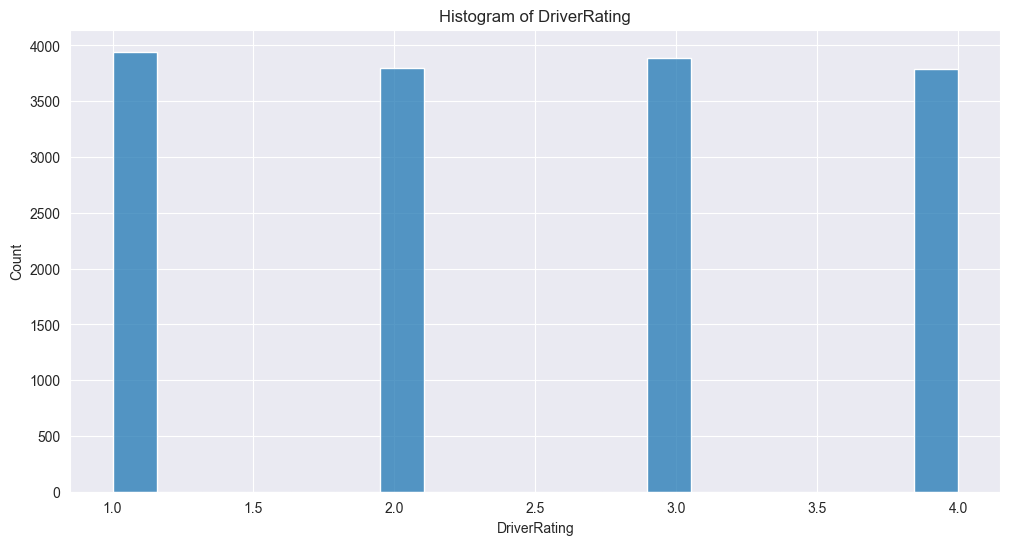

In [176]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))

sns.histplot(data=X_df, x='DriverRating', stat='count', ax=ax)
# sns.boxplot(data=X_df, x='Age', ax=ax[1])
plt.title("Histogram of DriverRating")
plt.show()

**Insights**

- All ratings are approximately equally distributed across all customers, showing no sign of pattern for a specific rating.

### Year

Año en que se registró el reclamo o accidente.

In [178]:
utils.show_value_counts(X_df, column='Year', sort_index=False)

,counts,proportions,percentage
Year,,,
1996,4083,0.265,26.479
1995,5195,0.337,33.690
1994,6142,0.398,39.831


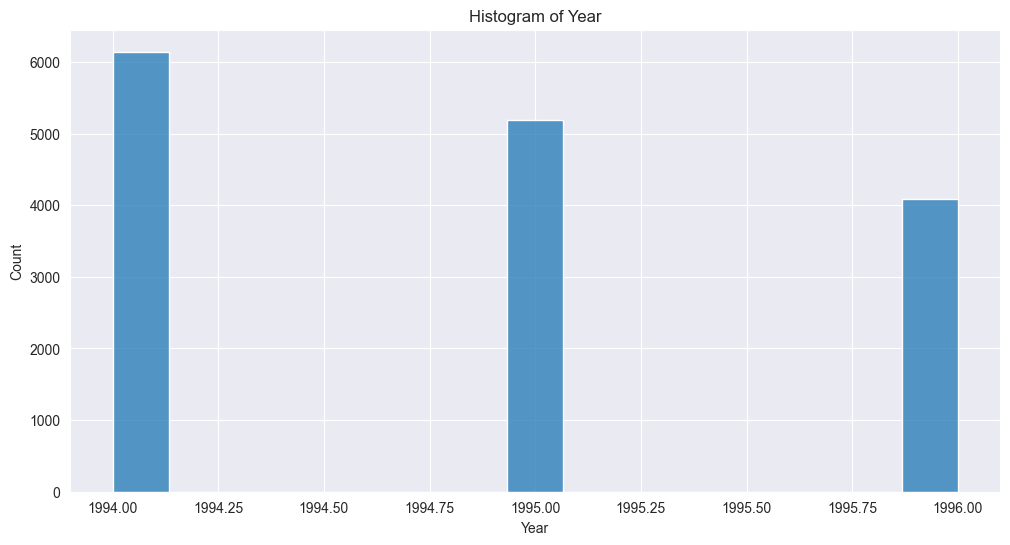

In [180]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))

sns.histplot(data=X_df, x='Year', stat='count', ax=ax)
# sns.boxplot(data=X_df, x='Age', ax=ax[1])
plt.title("Histogram of Year")
plt.show()

**Insights**

- Claims were collected from 1994 to 1996, most of them were registered on 1994 with 40% of claims followed by 1995 with 34% and 1996 with 26%.

---

## 2.2. Categorical Columns

In [182]:
categorical_features = df.select_dtypes(include='object').columns.tolist()
print(f"There are {len(categorical_features)} categorical features:\n\t {categorical_features}")

There are 27 categorical features:
	 ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'RepNumber', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']


### Month

In [18]:
for col in categorical_columns:
    print(f"{col}:\n\t{df[col].unique()}")

Month:
	['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']
DayOfWeek:
	['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
Make:
	['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
AccidentArea:
	['Urban' 'Rural']
DayOfWeekClaimed:
	['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
MonthClaimed:
	['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']
Sex:
	['Female' 'Male']
MaritalStatus:
	['Single' 'Married' 'Widow' 'Divorced']
Fault:
	['Policy Holder' 'Third Party']
PolicyType:
	['Sport - Liability' 'Sport - Collision' 'Sedan - Liability'
 'Utility - All Perils' 'Sedan - All Perils' 'Sedan - Collision'
 'Utility - Collision' 'Utility - Liability' 'Sport - All Perils']
VehicleCategory:
	['Sport' 'Utility' 'Sedan']
VehiclePrice:
	['more than 69000' '20000 to 29000' '30000 to 39

Variables que tienen 'none':

<Axes: xlabel='Days_Policy_Claim', ylabel='count'>

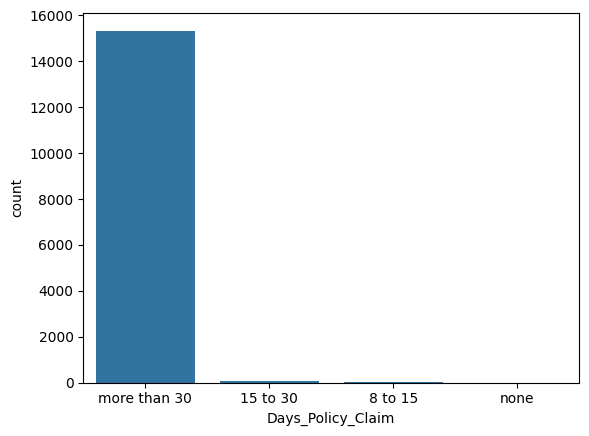

In [28]:
sns.countplot(data=df, x='Days_Policy_Claim')

In [ ]:
round(df['Days_Policy_Claim'].value_counts()/len(df))

Days_Policy_Claim
more than 30    0.995
15 to 30        0.004
8 to 15         0.001
none            0.000
Name: count, dtype: float64

---

Variables iniciales a considerar: Age, Sex, MaritalStatus, Deductible, DayOfWeek, Fault, VehiclePrice, FraudFound_P, DriverRating, PastNumberOfClaims

In [32]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [88]:
data = df.loc[:,["Age", "Sex", "MaritalStatus", "Deductible", "DayOfWeek", "Fault", "VehiclePrice", "DriverRating", "PastNumberOfClaims", "FraudFound_P"]]
data.Sex = data.Sex.map({'Male': 0, 'Female': 1})
data.Fault = data.Fault.map({'Policy Holder': 0, 'Third Party': 1}) 
data.VehiclePrice = data.VehiclePrice.map({ 'less than 20000':0,  '20000 to 29000':1,  '30000 to 39000':2,  '40000 to 59000':3,  '60000 to 69000':4,  'more than 69000':5}) 
data.PastNumberOfClaims = data.PastNumberOfClaims.map({'none': 0, '1': 1, '2 to 4': 2, 'more than 4': 3})
data = pd.get_dummies(data, columns=['MaritalStatus', 'DayOfWeek'], drop_first=True, dtype=int)

data.drop(columns="FraudFound_P", inplace=True)
data["FraudFound_P"] = df.FraudFound_P

In [127]:
data

,Age,Sex,Deductible,Fault,VehiclePrice,DriverRating,PastNumberOfClaims,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,FraudFound_P
0,21,1,300,0,5,1,0,0,1,0,0,0,0,0,0,1,0
1,34,0,400,0,5,4,0,0,1,0,0,0,0,0,0,1,0
2,47,0,400,0,5,3,1,1,0,0,0,0,0,0,0,0,0
3,65,0,400,1,1,2,1,1,0,0,0,1,0,0,0,0,0
4,27,1,400,1,5,1,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,35,0,400,0,1,4,2,1,0,0,0,0,0,0,0,0,1
15416,30,0,400,0,2,3,3,1,0,0,0,0,0,1,0,0,0
15417,24,0,400,0,1,4,3,0,1,0,0,0,0,1,0,0,1
15418,34,1,400,1,1,4,0,1,0,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [100]:
data_train, data_test = train_test_split(data, test_size=0.3)

data_train_X, data_train_y = data_train.drop('FraudFound_P', axis=1), data_train.loc[:, ['FraudFound_P']]
data_test_X, data_test_y = data_test.drop('FraudFound_P', axis=1), data_test.loc[:, ['FraudFound_P']]

In [ ]:
scaler = StandardScaler()

data_train_scaled = scaler.fit_transform(data_train_X)
data_test_scaled = scaler.transform(data_test_X)

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.001)


tree.fit(data_train_scaled, data_train_y)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.001)

In [128]:
from sklearn.metrics import accuracy_score, precision_score

In [126]:
accuracy_score(data_test_y, tree.predict(data_test_scaled))

0.9433635970600951

In [129]:
precision_score(data_test_y, tree.predict(data_test_scaled))

0.5454545454545454

## Referencias

https://www.interseguro.pe/blog/deducible-en-los-seguros